    Name : Abhishek Panda
    CWID : 10478684
    Homework : 2

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
import pylab as py
import scipy.stats as stats

In [2]:
data = pd.read_csv("lung.csv")

In [3]:
data

,ID,AREA,Gender_father,Age_father,Height_father,Weight_father,FVC_father,FEV1_father,Gender_mother,Age_mother,...,Height_middle_child,Weight_middle_child,FVC_middle_child,FEV1_middle_child,Sex_youngest_child,Age_youngest_child,Height_youngest_child,Weight_youngest_child,FVC_youngest_child,FEV1_youngest_child
0,1,1,1,53,61,161,391,323,2,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,40,72,198,441,395,2,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,26,69,210,445,347,2,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,34,68,187,433,374,2,36,...,49.0,56.0,159.0,130.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,46,61,121,354,290,2,39,...,60.0,85.0,268.0,234.0,2.0,10.0,50.0,53.0,154.0,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,4,1,53,69,162,441,340,2,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,147,4,1,37,72,195,473,418,2,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,148,4,1,39,67,181,549,450,2,33,...,49.0,55.0,181.0,165.0,NaN,NaN,NaN,NaN,NaN,NaN
148,149,4,1,36,66,129,495,374,2,29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Summary statistics of dataset
data_summary = data.describe()

In [5]:
data_summary

,ID,AREA,Gender_father,Age_father,Height_father,Weight_father,FVC_father,FEV1_father,Gender_mother,Age_mother,...,Height_middle_child,Weight_middle_child,FVC_middle_child,FEV1_middle_child,Sex_youngest_child,Age_youngest_child,Height_youngest_child,Weight_youngest_child,FVC_youngest_child,FEV1_youngest_child
count,150.000000,150.0000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.000000,...,74.000000,74.000000,74.000000,74.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,75.500000,2.7400,1.0,40.133333,69.260000,182.086667,495.233333,409.326667,2.0,37.560000,...,58.094595,91.824324,256.175676,221.256757,1.375000,10.541667,57.125000,87.208333,257.041667,215.916667
std,43.445368,1.1377,0.0,6.889995,2.779189,23.954077,79.366994,65.075227,0.0,6.714184,...,6.077511,33.042670,82.377740,71.934342,0.494535,2.186503,5.720387,33.354459,94.931316,81.658311
min,1.000000,1.0000,1.0,26.000000,61.000000,121.000000,302.000000,250.000000,2.0,26.000000,...,48.000000,49.000000,114.000000,90.000000,1.000000,7.000000,46.000000,44.000000,131.000000,112.000000
25%,38.250000,2.0000,1.0,35.000000,67.250000,166.000000,441.000000,366.750000,2.0,32.000000,...,54.000000,61.750000,190.000000,166.000000,1.000000,9.000000,54.000000,67.500000,194.000000,160.500000
50%,75.500000,3.0000,1.0,40.000000,69.000000,180.000000,495.500000,409.000000,2.0,36.500000,...,57.500000,85.500000,257.000000,216.000000,1.000000,10.000000,56.000000,75.000000,223.000000,194.000000
75%,112.750000,4.0000,1.0,44.750000,71.000000,198.000000,549.750000,451.000000,2.0,42.000000,...,62.000000,110.500000,304.000000,257.500000,2.000000,12.000000,60.250000,97.500000,291.500000,245.750000
max,150.000000,4.0000,1.0,59.000000,76.000000,245.000000,666.000000,585.000000,2.0,56.000000,...,74.000000,203.000000,459.000000,419.000000,2.000000,15.000000,67.000000,191.000000,473.000000,405.000000


In [6]:
# Variance of the dataset 
np.var(data)

ID                        1874.916667
AREA                         1.285733
Gender_father                0.000000
Age_father                  47.155556
Height_father                7.672400
Weight_father              569.972489
FVC_father                6257.125556
FEV1_father               4206.553289
Gender_mother                0.000000
Age_mother                  44.779733
Height_mother                6.057956
Weight_mother              951.865956
FVC_mother                3627.112222
FEV1_mother               2359.881822
Sex_oldest_child             0.250000
Age_oldest_child            10.112222
Height_oldest_child         47.671289
Weight_oldest_child       1440.955600
FVC_oldest_child         15868.802489
FEV1_oldest_child        11185.112933
Sex_middle_child             0.243426
Age_middle_child             6.784514
Height_middle_child         36.436998
Weight_middle_child       1077.063733
FVC_middle_child          6694.388057
FEV1_middle_child         5104.623265
Sex_youngest

In [7]:
# Deleting rows with NAN
data = data.dropna()

In [8]:
# Normalizing the dataset 
normalized_data = preprocessing.normalize(data)

In [9]:
# Covariance of the dataset 
np.cov(data)

array([[11164.15725806, 16459.44959677, 16696.25806452, 12788.97379032,
        15962.87701613, 13685.30241935, 12735.18951613,  9938.52822581,
        14750.04032258, 16781.92540323, 16088.26008065, 16544.22782258,
        13125.17943548, 13201.75403226, 15283.82258065, 15357.59879032,
        14281.55443548, 18578.78830645, 14986.65322581, 16214.05040323,
        12552.53024194, 14756.89919355, 13836.92540323, 12448.70967742],
       [16459.44959677, 25673.91028226, 24789.67741935, 19463.93044355,
        23380.51108871, 21849.71572581, 20189.33669355, 14444.98991935,
        22039.9233871 , 26006.18044355, 24448.60584677, 24546.79939516,
        19455.50100806, 19389.28024194, 23577.92741935, 23626.71068548,
        22098.78528226, 27777.40221774, 22591.97177419, 23873.35584677,
        18645.9828629 , 23555.44959677, 21233.56754032, 18682.61290323],
       [16696.25806452, 24789.67741935, 26825.29032258, 19365.48387097,
        25283.32258065, 19970.58064516, 18814.16129032, 15296.

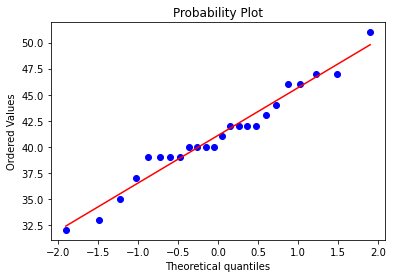

In [10]:
#QQ plot Features: Age_father 
stats.probplot(data['Age_father'], dist="norm", plot=py)
py.show()

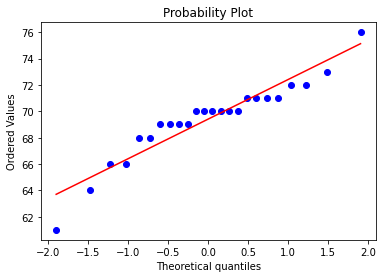

In [11]:
#QQ plot Features: Height_father
stats.probplot(data['Height_father'], dist="norm", plot=py)
py.show()

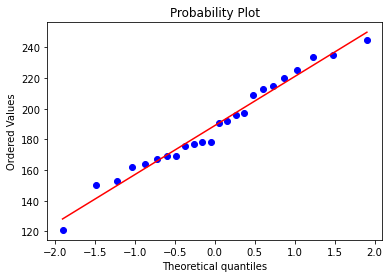

In [12]:
#QQ plot Features: Weight_father
stats.probplot(data['Weight_father'], dist="norm", plot=py)
py.show()

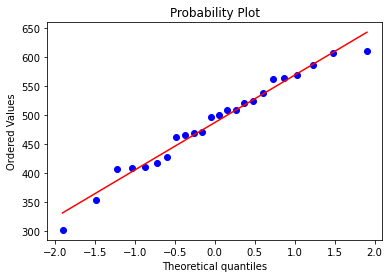

In [13]:
#QQ plot Features: FVC_father
stats.probplot(data['FVC_father'], dist="norm", plot=py)
py.show()